<div style="font-size: 40px; text-align:center;">Face Mask Detection using <b style="color: #34c6eb">YOLOv8<b></div>

<div style="font-size: 30px;">Importing Libraries <b style="color: #34c6eb"><b></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import os
import cv2
sns.set_theme('talk')

<div style="font-size: 30px;">Define paths for <b style="color: #34c6eb">images</b> and <b style="color: #34c6eb">annotations</b></div>

In [3]:
images_path = r"F:/Why Not Study/LU/Foundation of AI/images/"
annotations_path = r"F:/Why Not Study/LU/Foundation of AI/annotations/"

In [4]:
image_names = os.listdir(images_path)

image_names[:5]

['maksssksksss0.png',
 'maksssksksss1.png',
 'maksssksksss10.png',
 'maksssksksss100.png',
 'maksssksksss101.png']

In [6]:
annotation_names = os.listdir(annotations_path)

annotation_names[:5]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss10.xml',
 'maksssksksss100.xml',
 'maksssksksss101.xml']

In [7]:
len(annotation_names) == len(image_names)

True

In [8]:
images_data = pd.DataFrame(pd.Series([images_path + i for i in image_names], name='path'))

images_data.head()

,path
0,F:/Why Not Study/LU/Foundation of AI/images/ma...
1,F:/Why Not Study/LU/Foundation of AI/images/ma...
2,F:/Why Not Study/LU/Foundation of AI/images/ma...
3,F:/Why Not Study/LU/Foundation of AI/images/ma...
4,F:/Why Not Study/LU/Foundation of AI/images/ma...


In [9]:
images_data['path'].iloc[0]

'F:/Why Not Study/LU/Foundation of AI/images/maksssksksss0.png'

In [10]:
images_data['id'] = images_data['path'].apply(lambda x: int(x.split('/')[-1].split('.')[0].removeprefix('maksssksksss')))

In [11]:
images_data['id'] = images_data['path'].apply(
    lambda x: int(''.join(filter(str.isdigit, x.split('/')[-1].replace('maksssksksss', ''))))
)

<div style="font-size: 30px;">DataFrame creation</div>

In [12]:
images_data = images_data[['id', 'path']]

images_data.head()

,id,path
0,0,F:/Why Not Study/LU/Foundation of AI/images/ma...
1,1,F:/Why Not Study/LU/Foundation of AI/images/ma...
2,10,F:/Why Not Study/LU/Foundation of AI/images/ma...
3,100,F:/Why Not Study/LU/Foundation of AI/images/ma...
4,101,F:/Why Not Study/LU/Foundation of AI/images/ma...


In [13]:
images_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      853 non-null    int64 
 1   path    853 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.5+ KB


<div style="font-size: 30px;">Parsing annotaions using <b style="color: #34c6eb">ElementTree<b></div><ul style="font-size: 17px">
    <li>here i wanted to explore the whole annotations data with their details.</li>
    <li>also wanted to make sure if there's nothing else we're gonna need beside the boundry boxes and classes.</li>
    <li>if there's a big difference in the dataset, we're gonna use these details to perform some analysis.</li>
</ul>

[![Blank-diagram.png](https://i.postimg.cc/MKpT5310/Blank-diagram.png)](https://postimg.cc/w3ngTVf3)

<ul>
    <li style="font-size:20px">The previous diagram shows the structure of the xml tree.</li>
    <li style="font-size:20px">If you are not familiar with the xml trees, you can check out <a href="https://www.youtube.com/watch?v=5SlemSWGD1g&t=223s&pp=ygUaaG93IHRvIHBhcnNlIHhtbCBpbiBweXRob24%3D">this video</a></li>
</ul>

In [14]:
import xml.etree.ElementTree as ET
import pandas as pd

def get_xml_data(path):
    tree = ET.parse(path)
    root = tree.getroot()
    id = int(root[1].text.split('.')[0].removeprefix('maksssksksss')) # you can use regular expressions to extract the id though
    width = int(root[2][0].text)
    height = int(root[2][1].text)
    depth = int(root[2][2].text)
    segmented = int(root[3].text)

    records = []

    for i in root[4:]:
        record = {
            'file_id': id,
            'width': width,
            'height': height,
            'depth': depth,
            'segmented': segmented,
            'class': i[0].text,
            'pose': i[1].text,
            'truncated': int(i[2].text),
            'occluded': int(i[3].text),
            'difficult': int(i[4].text),
            'xmin': int(i[5][0].text),
            'ymin': int(i[5][1].text),
            'xmax': int(i[5][2].text),
            'ymax': int(i[5][3].text)
        }
        records.append(record)

    return records


<ul>
    <li style="font-size:18px">The previous code gathers each boundry box's information.</li>
    <li style="font-size:18px">Thought i could get a good analysis out of all of this but...🥲</li>
</ul>

In [15]:
annotations_data = []
for i in annotation_names:
    annotations_data.extend(get_xml_data(annotations_path + i))

annotations_data = pd.DataFrame(annotations_data)

In [16]:
annotations_data

,file_id,width,height,depth,segmented,class,pose,truncated,occluded,difficult,xmin,ymin,xmax,ymax
0,0,512,366,3,0,without_mask,Unspecified,0,0,0,79,105,109,142
1,0,512,366,3,0,with_mask,Unspecified,0,0,0,185,100,226,144
2,0,512,366,3,0,without_mask,Unspecified,0,0,0,325,90,360,141
3,1,400,156,3,0,with_mask,Unspecified,0,0,0,321,34,354,69
4,1,400,156,3,0,with_mask,Unspecified,0,0,0,224,38,261,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,98,400,267,3,0,with_mask,Unspecified,0,0,0,263,62,287,85
4068,98,400,267,3,0,with_mask,Unspecified,0,0,0,344,80,377,106
4069,99,400,267,3,0,mask_weared_incorrect,Unspecified,0,0,0,181,54,273,162
4070,99,400,267,3,0,with_mask,Unspecified,0,0,0,99,87,176,165


In [17]:
images_data.head()

,id,path
0,0,F:/Why Not Study/LU/Foundation of AI/images/ma...
1,1,F:/Why Not Study/LU/Foundation of AI/images/ma...
2,10,F:/Why Not Study/LU/Foundation of AI/images/ma...
3,100,F:/Why Not Study/LU/Foundation of AI/images/ma...
4,101,F:/Why Not Study/LU/Foundation of AI/images/ma...


In [18]:
data = pd.merge(images_data, annotations_data, left_on='id', right_on='file_id', how='inner')

data    

,id,path,file_id,width,height,depth,segmented,class,pose,truncated,occluded,difficult,xmin,ymin,xmax,ymax
0,0,F:/Why Not Study/LU/Foundation of AI/images/ma...,0,512,366,3,0,without_mask,Unspecified,0,0,0,79,105,109,142
1,0,F:/Why Not Study/LU/Foundation of AI/images/ma...,0,512,366,3,0,with_mask,Unspecified,0,0,0,185,100,226,144
2,0,F:/Why Not Study/LU/Foundation of AI/images/ma...,0,512,366,3,0,without_mask,Unspecified,0,0,0,325,90,360,141
3,1,F:/Why Not Study/LU/Foundation of AI/images/ma...,1,400,156,3,0,with_mask,Unspecified,0,0,0,321,34,354,69
4,1,F:/Why Not Study/LU/Foundation of AI/images/ma...,1,400,156,3,0,with_mask,Unspecified,0,0,0,224,38,261,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,98,F:/Why Not Study/LU/Foundation of AI/images/ma...,98,400,267,3,0,with_mask,Unspecified,0,0,0,263,62,287,85
4068,98,F:/Why Not Study/LU/Foundation of AI/images/ma...,98,400,267,3,0,with_mask,Unspecified,0,0,0,344,80,377,106
4069,99,F:/Why Not Study/LU/Foundation of AI/images/ma...,99,400,267,3,0,mask_weared_incorrect,Unspecified,0,0,0,181,54,273,162
4070,99,F:/Why Not Study/LU/Foundation of AI/images/ma...,99,400,267,3,0,with_mask,Unspecified,0,0,0,99,87,176,165


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         4072 non-null   int64 
 1   path       4072 non-null   object
 2   file_id    4072 non-null   int64 
 3   width      4072 non-null   int64 
 4   height     4072 non-null   int64 
 5   depth      4072 non-null   int64 
 6   segmented  4072 non-null   int64 
 7   class      4072 non-null   object
 8   pose       4072 non-null   object
 9   truncated  4072 non-null   int64 
 10  occluded   4072 non-null   int64 
 11  difficult  4072 non-null   int64 
 12  xmin       4072 non-null   int64 
 13  ymin       4072 non-null   int64 
 14  xmax       4072 non-null   int64 
 15  ymax       4072 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 509.1+ KB


<ul>
    <li style="font-size:18px">if we dig deep into each column, we would find the most of them are completely useless.</li>
</ul>

In [20]:
data.drop(columns=['depth', 'segmented', 'pose', 'truncated', 'difficult'], inplace=True)

In [21]:
data

,id,path,file_id,width,height,class,occluded,xmin,ymin,xmax,ymax
0,0,F:/Why Not Study/LU/Foundation of AI/images/ma...,0,512,366,without_mask,0,79,105,109,142
1,0,F:/Why Not Study/LU/Foundation of AI/images/ma...,0,512,366,with_mask,0,185,100,226,144
2,0,F:/Why Not Study/LU/Foundation of AI/images/ma...,0,512,366,without_mask,0,325,90,360,141
3,1,F:/Why Not Study/LU/Foundation of AI/images/ma...,1,400,156,with_mask,0,321,34,354,69
4,1,F:/Why Not Study/LU/Foundation of AI/images/ma...,1,400,156,with_mask,0,224,38,261,73
...,...,...,...,...,...,...,...,...,...,...,...
4067,98,F:/Why Not Study/LU/Foundation of AI/images/ma...,98,400,267,with_mask,0,263,62,287,85
4068,98,F:/Why Not Study/LU/Foundation of AI/images/ma...,98,400,267,with_mask,0,344,80,377,106
4069,99,F:/Why Not Study/LU/Foundation of AI/images/ma...,99,400,267,mask_weared_incorrect,0,181,54,273,162
4070,99,F:/Why Not Study/LU/Foundation of AI/images/ma...,99,400,267,with_mask,0,99,87,176,165


<ul>
    <li style="font-size:18px">Counts between classes.</li>
</ul>

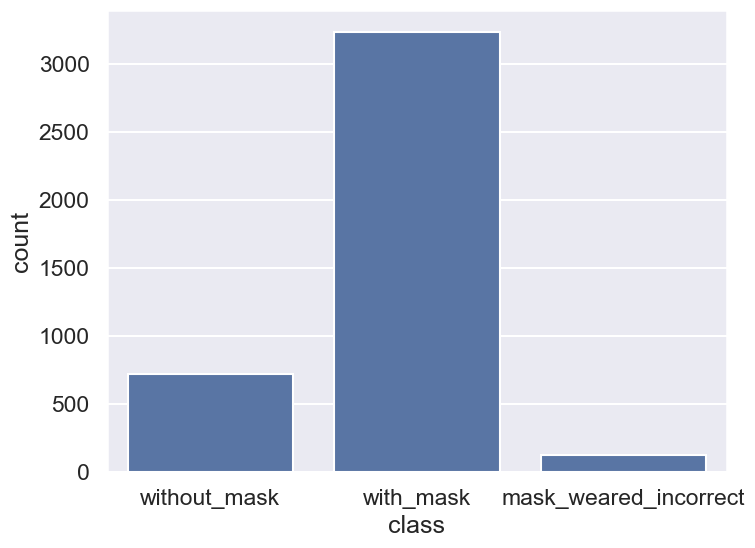

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data, x='class')
plt.show()

<ul>
    <li style="font-size:18px">To preview images by id.</li>
</ul>

In [23]:
def display_image(image_id):
    data_to_plot = data[data['id'] == image_id]

    fig, ax = plt.subplots()
    plt.grid(False); plt.axis(False)
    plt.imshow(plt.imread(data_to_plot['path'].iloc[0]))

    for _, row in data_to_plot.iterrows():
        x, y, width, height, color = row['xmin'], row['ymin'], row['xmax']-row['xmin'], row['ymax'] - row['ymin'], 'r' if row['class'] == 'without_mask' else 'g' if row['class'] == 'with_mask' else 'b'
        rect = patches.Rectangle((x, y), width, height,
                                linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)

    colors = {
        'without_mask': 'r',
        'with_mask': 'g',
        'mask_weared_incorrectly': 'b'
    }

    legend_patches = [patches.Patch(color=color, label=label) for label, color in colors.items()]
    ax.legend(handles=legend_patches, loc='lower right', fontsize='xx-small')

    plt.show()

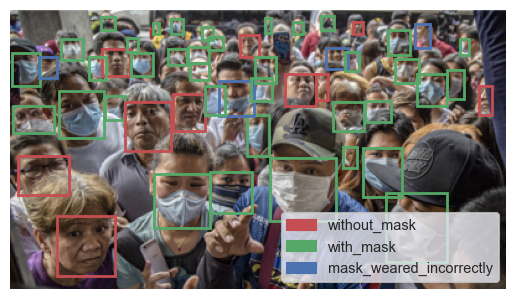

In [25]:
display_image(52)

In [26]:
max_width = data['width'].max()
max_height = data['height'].max()

max_width, max_height

(600, 600)

In [27]:
data.head()

,id,path,file_id,width,height,class,occluded,xmin,ymin,xmax,ymax
0,0,F:/Why Not Study/LU/Foundation of AI/images/ma...,0,512,366,without_mask,0,79,105,109,142
1,0,F:/Why Not Study/LU/Foundation of AI/images/ma...,0,512,366,with_mask,0,185,100,226,144
2,0,F:/Why Not Study/LU/Foundation of AI/images/ma...,0,512,366,without_mask,0,325,90,360,141
3,1,F:/Why Not Study/LU/Foundation of AI/images/ma...,1,400,156,with_mask,0,321,34,354,69
4,1,F:/Why Not Study/LU/Foundation of AI/images/ma...,1,400,156,with_mask,0,224,38,261,73


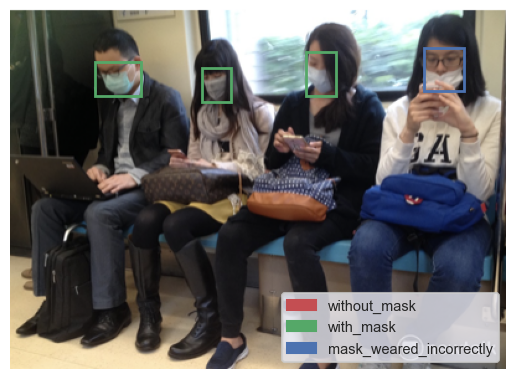

In [28]:
display_image(2)

In [29]:
!pip install ultralytics

In [30]:
def xml_to_yolo_bndbox(bbox, w, h):
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h

    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h

    return [x_center, y_center, width, height]

def yolo_to_xml_bndbox(bbox, w, h):
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2

    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)

    return [xmin, ymin, xmax, ymax]

In [31]:
os.makedirs("labels", exist_ok=True) # has the annotations as a .txt files

def convert_xml_txt(path):
    classes = {
        "without_mask" : 0,
        "with_mask" : 1,
        "mask_weared_incorrect" : 2
    }
    
    tree = ET.parse(path)
    root = tree.getroot()
    
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)
    
    file_name = '.'.join([root[1].text.split('.')[0], 'txt'])

    objects = [i for i in root.findall('object')]

    output = []
    
    for i in objects:
        data = []
        
        data.append(classes[i[0].text])
        coords = [int(j.text) for j in i.find('bndbox')]
        coords = xml_to_yolo_bndbox(coords, width, height)
        data = data + coords

        output.append(data)

    return (file_name, output)

In [32]:
x = convert_xml_txt(r'F:/Why Not Study/LU/Foundation of AI/annotations/maksssksksss0.xml')

<ul>
    <li style="font-size:18px">This is the shape we need.</li>
</ul>

In [33]:
x

('maksssksksss0.txt',
 [[0, 0.18359375, 0.337431693989071, 0.05859375, 0.10109289617486339],
  [1, 0.4013671875, 0.3333333333333333, 0.080078125, 0.12021857923497267],
  [0, 0.6689453125, 0.3155737704918033, 0.068359375, 0.13934426229508196]])

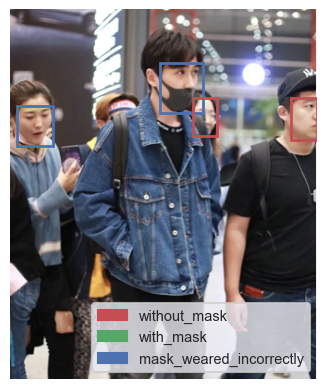

In [34]:
display_image(130)

<ul>
    <li style="font-size:18px">Now just convery all the xml files to the <b style="font-weight: bold;color: #34c6eb">YOLO</b> format.</li>
</ul>

In [35]:
    for a in annotation_names:
        x = convert_xml_txt(annotations_path + a)
        with open('labels/' + x[0], 'w') as f:
            objects = x[1] 
            f.write('\n'.join([' '.join([str(j) for j in i]) for i in objects]))

<ul>
    <li style="font-size:18px">now we just want to split or data into train, validation and test.</li>
    <li style="font-size:18px">so we make a folder for each one of them, each folder contains two subfolders, one for the images, one for the labels corresponding to the images.</li>
</ul>

In [36]:
os.makedirs('modeling/', exist_ok=True)

# here we store the train images with it's labels
os.makedirs('modeling/train', exist_ok=True)
os.makedirs('modeling/train/images', exist_ok=True)
os.makedirs('modeling/train/labels', exist_ok=True)

# here we store the validation images with it's labels
os.makedirs('modeling/validation', exist_ok=True)
os.makedirs('modeling/validation/images', exist_ok=True)
os.makedirs('modeling/validation/labels', exist_ok=True)

# here we store the test images with it's labels
os.makedirs('modeling/test', exist_ok=True)
os.makedirs('modeling/test/images', exist_ok=True)
os.makedirs('modeling/test/labels', exist_ok=True)

In [37]:
full_data = pd.DataFrame(pd.Series([images_path + i for i in image_names], name="img_path"))
full_data['label_path'] = full_data['img_path'].apply(lambda x : "labels/" + x.split('/')[-1].split('.')[0] + '.txt')

full_data

,img_path,label_path
0,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss0.txt
1,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss1.txt
2,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss10.txt
3,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss100.txt
4,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss101.txt
...,...,...
848,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss95.txt
849,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss96.txt
850,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss97.txt
851,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss98.txt


<ul>
    <li style="font-size:18px">there's a lot of ways to split the data, i used <b style="font-style: italic; font-weight: bold;">sklearn</b> to that</li>
</ul>

In [38]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(full_data, test_size=0.4, random_state=42)

val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [39]:
train_df

,img_path,label_path
693,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss722.txt
529,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss575.txt
94,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss183.txt
11,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss108.txt
396,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss455.txt
...,...,...
71,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss162.txt
106,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss194.txt
270,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss341.txt
435,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss490.txt


In [40]:
val_df

,img_path,label_path
473,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss524.txt
113,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss20.txt
131,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss216.txt
426,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss482.txt
231,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss306.txt
...,...,...
569,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss610.txt
109,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss197.txt
477,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss528.txt
734,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss76.txt


In [41]:
test_df

,img_path,label_path
500,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss549.txt
851,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss98.txt
286,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss356.txt
467,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss519.txt
215,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss292.txt
...,...,...
444,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss499.txt
409,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss467.txt
813,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss830.txt
445,F:/Why Not Study/LU/Foundation of AI/images/ma...,labels/maksssksksss5.txt


<ul>
    <li style="font-size:18px">you can just move the files you need, but just incase something wrong happened and we would have to re-import the dataset again, just copy them, yeah?</li>
</ul>

In [42]:
#原来人家的代码
import shutil

# copy train
for index, row in train_df.iterrows():
    img_src = row['img_path']
    img_dst = os.path.join("modeling/train/images/", os.path.basename(img_src))
    shutil.copy(img_src, img_dst)
    
    label_src = row['label_path']
    label_dst = os.path.join("modeling/train/labels/", os.path.basename(label_src))
    shutil.copy(label_src, label_dst)

# copy test
for index, row in test_df.iterrows():
    img_src = row['img_path']
    img_dst = os.path.join("modeling/test/images/", os.path.basename(img_src))
    shutil.copy(img_src, img_dst)
    
    label_src = row['label_path']
    label_dst = os.path.join("modeling/test/labels/", os.path.basename(label_src))
    shutil.copy(label_src, label_dst)

# copy validation
for index, row in val_df.iterrows():
    img_src = row['img_path']
    img_dst = os.path.join("modeling/validation/images/", os.path.basename(img_src))
    shutil.copy(img_src, img_dst)
    
    label_src = row['label_path']
    label_dst = os.path.join("modeling/validation/labels/", os.path.basename(label_src))
    shutil.copy(label_src, label_dst)

In [43]:
#我修改后的代码
import os
import shutil

def copy_files(dataframe, img_dest_folder, label_dest_folder):
    os.makedirs(img_dest_folder, exist_ok=True)
    os.makedirs(label_dest_folder, exist_ok=True)

    for index, row in dataframe.iterrows():
        # 复制图像
        img_src = row['img_path']
        img_dst = os.path.join(img_dest_folder, os.path.basename(img_src))
        
        print(f"正在处理图像: 源路径: {img_src}, 目标路径: {img_dst}")
        
        if os.path.exists(img_src):
            try:
                shutil.copy(img_src, img_dst)
                print(f"已复制图像: {img_src} 到 {img_dst}")
            except Exception as e:
                print(f"复制图像时出错: {e}")
        else:
            print(f"图像未找到: {img_src}")

        # 复制标签
        label_src = row['label_path']
        label_dst = os.path.join(label_dest_folder, os.path.basename(label_src))

        print(f"正在处理标签: 源路径: {label_src}, 目标路径: {label_dst}")
        
        if os.path.exists(label_src):
            try:
                shutil.copy(label_src, label_dst)
                print(f"已复制标签: {label_src} 到 {label_dst}")
            except Exception as e:
                print(f"复制标签时出错: {e}")
        else:
            print(f"标签未找到: {label_src}")

# 复制训练集
copy_files(train_df, "modeling/train/images/", "modeling/train/labels/")

# 复制测试集
copy_files(test_df, "modeling/test/images/", "modeling/test/labels/")

# 复制验证集
copy_files(val_df, "modeling/validation/images/", "modeling/validation/labels/")

正在处理图像: 源路径: F:/Why Not Study/LU/Foundation of AI/images/maksssksksss722.png, 目标路径: modeling/train/images/maksssksksss722.png
已复制图像: F:/Why Not Study/LU/Foundation of AI/images/maksssksksss722.png 到 modeling/train/images/maksssksksss722.png
正在处理标签: 源路径: labels/maksssksksss722.txt, 目标路径: modeling/train/labels/maksssksksss722.txt
已复制标签: labels/maksssksksss722.txt 到 modeling/train/labels/maksssksksss722.txt
正在处理图像: 源路径: F:/Why Not Study/LU/Foundation of AI/images/maksssksksss575.png, 目标路径: modeling/train/images/maksssksksss575.png
已复制图像: F:/Why Not Study/LU/Foundation of AI/images/maksssksksss575.png 到 modeling/train/images/maksssksksss575.png
正在处理标签: 源路径: labels/maksssksksss575.txt, 目标路径: modeling/train/labels/maksssksksss575.txt
已复制标签: labels/maksssksksss575.txt 到 modeling/train/labels/maksssksksss575.txt
正在处理图像: 源路径: F:/Why Not Study/LU/Foundation of AI/images/maksssksksss183.png, 目标路径: modeling/train/images/maksssksksss183.png
已复制图像: F:/Why Not Study/LU/Foundation of AI/images/maksssk

<ul>
    <li style="font-size:18px"><b style="color: #34c6eb; font-weight: bold;">yaml</b> is a file that contains the paths for the train and validation data along with the classess for the detection.</li>
    <li style="font-size:18px">make sure of that all the paths are correct <b style="font-style: italic; font-weight: bold;">(based on the dir we will initiate the training from)</b> if you are using relative ones, it's more convenient to use the absolute paths.</li>
</ul>

In [45]:
#卡在了这一步
yaml_text = """train: F:/Why Not Study/LU/cv/pythonProject/modeling/train/images
val: F:/Why Not Study/LU/cv/pythonProject/modeling/validation/images

nc: 3
names: ["without_mask", "with_mask", "mask_weared_incorrect"]"""

with open("F:/Why Not Study/LU/cv/pythonProject/modeling/data.yaml", 'w') as file:
    file.write(yaml_text)

<ul>
    <li style="font-size:18px"><b style="color: #34c6eb">ultralytics</b> library contains the <b style="font-weight: bold;color: #34c6eb">YOLO</b> pre-trained model we need.</li>
</ul>

In [46]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.97  Python-3.12.4 torch-2.6.0+cpu CPU (Intel Core(TM) i7-10875H 2.30GHz)
Setup complete  (16 CPUs, 15.9 GB RAM, 150.6/300.0 GB disk)


In [47]:
os.makedirs("results", exist_ok=True)

<ul>
    <li style="font-size:18px">initiate the training process by providing the model path and the <b style="font-style: italic; font-weight:bold">.yaml</b> path</li>
</ul>

In [48]:
%cd F:/Why Not Study/LU/cv/pythonProject/results

!yolo train model=yolov8n.pt data= 'F:/Why Not Study/LU/cv/pythonProject/modeling/data.yaml' epochs=50 imgsz=640

F:\Why Not Study\LU\cv\pythonProject\results


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "F:\Why Not Study\LU\cv\pythonProject\.venv\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "F:\Why Not Study\LU\cv\pythonProject\.venv\Lib\site-packages\ultralytics\cfg\__init__.py", line 909, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "F:\Why Not Study\LU\cv\pythonProject\.venv\Lib\site-packages\ultralytics\cfg\__init__.py", line 497, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'Not' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'train', 'model=yolov8n.pt', 'data=', "'F:/Why", 'Not', "Study/LU/cv/pythonProject/modeling/data.yaml'", 'epochs=50', 'imgsz=640']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'segment', 'detect', 'obb', 'pose', 'classify'}

In [57]:
from ultralytics import YOLO

# 加载模型
model = YOLO('F:/Why Not Study/LU/cv/pythonProject/yolov8n.pt')

# 训练模型
results = model.train(data='F:/Why Not Study/LU/cv/pythonProject/modeling/data.yaml', epochs=50, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.98 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.97  Python-3.12.4 torch-2.6.0+cpu CPU (Intel Core(TM) i7-10875H 2.30GHz)
engine\trainer: task=detect, mode=train, model=F:/Why Not Study/LU/cv/pythonProject/yolov8n.pt, data=F:/Why Not Study/LU/cv/pythonProject/modeling/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

train: Scanning F:\Why Not Study\LU\cv\pythonProject\modeling\train\labels.cache... 511 images, 0 backgrounds, 0 corrupt: 100%|██████████| 511/511 [00:00<?, ?it/s]
val: Scanning F:\Why Not Study\LU\cv\pythonProject\modeling\validation\labels.cache... 171 images, 0 backgrounds, 0 corrupt: 100%|██████████| 171/171 [00:00<?, ?it/s]

Plotting labels to runs\detect\train24\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train24
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.772      2.888        1.4         96        640: 100%|██████████| 32/32 [02:28<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:18<00:00,  3.10s/it]

                   all        171        729     0.0141      0.548      0.223       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.347       1.76       1.04        112        640:  12%|█▎        | 4/32 [00:18<02:10,  4.67s/it]


KeyboardInterrupt: 

<ul>
    <li style="font-size:18px">now time to test the model.</li>
</ul>

In [55]:
!yolo predict model=runs/detect/train/weights/best.pt source='F:/Why Not Study/LU/cv/pythonProject/modeling/test/images/'

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "F:\Why Not Study\LU\cv\pythonProject\.venv\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "F:\Why Not Study\LU\cv\pythonProject\.venv\Lib\site-packages\ultralytics\cfg\__init__.py", line 909, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "F:\Why Not Study\LU\cv\pythonProject\.venv\Lib\site-packages\ultralytics\cfg\__init__.py", line 497, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'Not' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'predict', 'model=runs/detect/train/weights/best.pt', "source='F:/Why", 'Not', "Study/LU/cv/pythonProject/modeling/test/images/'"]. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'pose', 'obb', 'detect', 'classify', 'segment'}

<ul>
    <li style="font-size:18px">access the prediction for the test dataset: <a style="text-decoration: underline; color: blue;">/kaggle/working/results/runs/detect/results/runs/detect</a></li>
    <li style="font-size:18px">access the final model in this path: <a style="text-decoration: underline; color: blue;">/kaggle/working/results/runs/detect/train/weights/best.pt</a></li>
</ul>

<div style="font-size: 28px; text-align:center;">and that's it, thank you for reaching this far and have a great day! 🥰</div>

![Goodbye](https://i.gifer.com/sCO.gif)